In [81]:
import pandas as pd
from pandas import DataFrame
from fbprophet import Prophet

In [170]:
df = pd.read_csv('total_cases.csv')
df = df[['date','Italy']]
df.columns = ['ds', 'y']
df.tail()

df1 = DataFrame([('2020-03-13', '15113')], columns=['ds','y'])

df = pd.concat([df, df1], axis=0)

In [171]:
df.tail(5)

,ds,y
48,2020-03-09,7375
49,2020-03-10,9172
50,2020-03-11,10149
51,2020-03-12,12462
0,2020-03-13,15113


In [172]:
# df = DataFrame([
#     ('2020-03-13', '10'),
#     ('2020-03-14', '8'),
#     ('2020-03-15', '4'),
#     ('2020-03-16', '1'),
# ], columns=['ds','y'])

In [173]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [174]:
future = m.make_future_dataframe(periods=30)
future

,ds
0,2020-01-21
1,2020-01-22
2,2020-01-23
3,2020-01-24
4,2020-01-25
...,...
78,2020-04-08
79,2020-04-09
80,2020-04-10
81,2020-04-11


In [175]:
df.tail(5)

,ds,y
48,2020-03-09,7375
49,2020-03-10,9172
50,2020-03-11,10149
51,2020-03-12,12462
0,2020-03-13,15113


In [179]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-21,-4700.872422,-7654.142468,-1753.835751
1,2020-01-22,-4444.908723,-7653.362330,-1322.524666
2,2020-01-23,-3948.606091,-7027.009670,-884.424362
3,2020-01-24,-3069.650577,-5853.637024,135.761574
4,2020-01-25,-4216.235625,-7517.956054,-999.783641
...,...,...,...,...
78,2020-04-08,11717.535936,8482.518759,14768.285919
79,2020-04-09,12214.038648,9175.537893,15471.519576
80,2020-04-10,13093.194243,9880.484254,16208.552847
81,2020-04-11,11946.809275,8841.948654,15303.245118


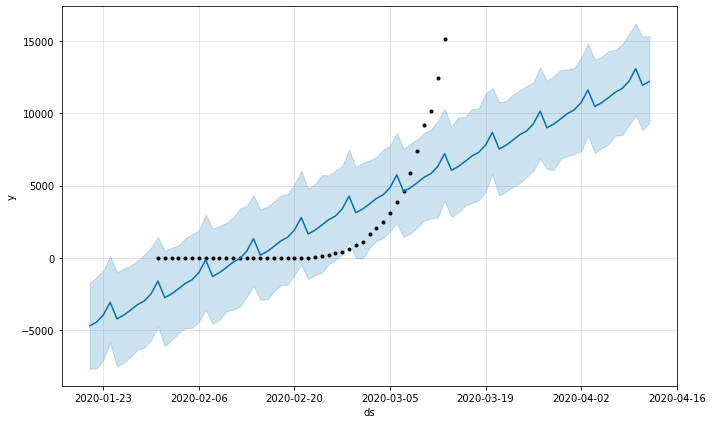

In [180]:
fig1 = m.plot(forecast)

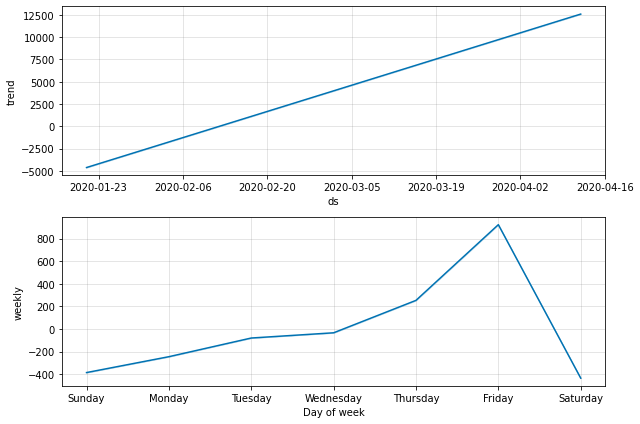

In [181]:
fig2 = m.plot_components(forecast)